In [81]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, generate_binary_structure
import numpy

# Laplace equation

In [82]:
def apply_boundary(z):
    z[:, +0] *= 0
    z[:, -1] *= 0
    z[+0, :] *= 0
    z[-1, :] *= 0

In [91]:
def f(x, y):
    return torch.zeros_like(x)

In [92]:
tx = torch.linspace(0, 3, 100)
ty = torch.linspace(0, 3, 100)
h = (tx[-1]-tx[0])/(tx.numel()-1)
x, y = torch.meshgrid(tx, ty, indexing="ij")

In [93]:
z = torch.zeros_like(x) - 1

In [94]:
operator = torch.zeros(3, 3)
operator[[0, 1, 1, 2], [1, 0, 2, 1]]=1
operator = operator.reshape(1, 1, 3, 3)/4

In [95]:
E = []

In [96]:
for j in range(100):
    z_updated = torch.nn.functional.conv2d(z[None, None, ...], weight=operator, stride=1, padding=1)[0, 0]
    z_updated -= h**2*f(x,y)
    apply_boundary(z_updated)
    
    error = ((z-z_updated)**2).mean()
    E.append(error.item())
    z = z_updated

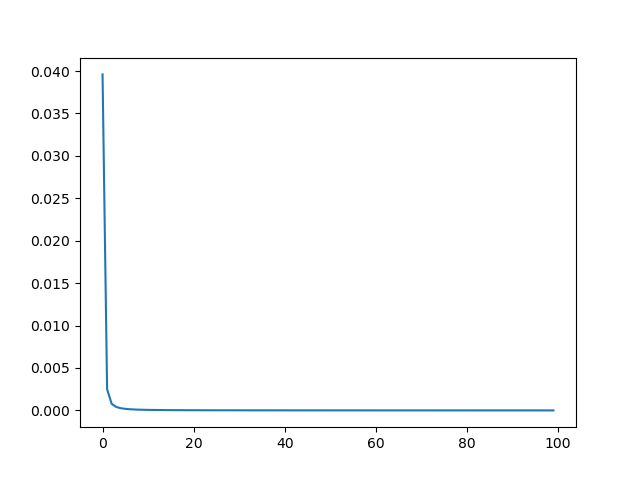

In [97]:
fig, ax = plt.subplots()
ax.plot(E)
plt.show()

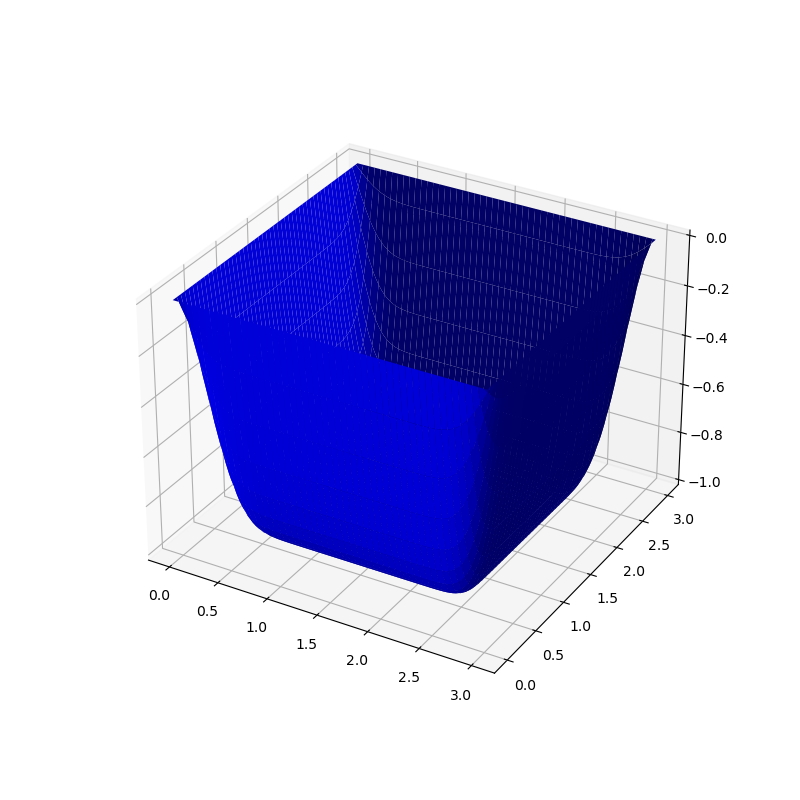

In [98]:
%matplotlib widget
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, color='blue')
plt.show()

# Biharmonic equation

In [99]:
def f(x, y):
    return torch.ones_like(x)

In [100]:
def apply_boundary(z):
    z[:, +0] *= 0
    z[:, -1] *= 0
    
    z[+0, :] *= 0
    z[-1, :] *= 0

In [101]:
def apply_neuman_boundary(z):
    
    z[:, +1] = z[:, +0]
    z[:, -2] = z[:, -1]
    
    z[+1, :] = z[+0, :]
    z[-2, :] = z[-1, :]

In [102]:
tx = torch.linspace(0, 3, 100)
ty = torch.linspace(0, 3, 100)
h = (tx[-1]-tx[0])/(tx.numel()-1)
x, y = torch.meshgrid(tx, ty, indexing="ij")

In [103]:
z = torch.zeros_like(x)

In [104]:
operator = torch.tensor([
    [+0, +0, -1, +0, +0],
    [+0, -2, +8, -2, +0],
    [-1, +8, +0, +8, -1],
    [+0, -2, +8, -2, +0],
    [+0, +0, -1, +0, +0]
])

In [105]:
operator = operator.reshape(1, 1, 5, 5)/20

In [106]:
E = []

In [107]:
for j in range(20):
    z_updated = torch.nn.functional.conv2d(z[None, None, ...], 
                                           weight=operator,
                                           stride=1,
                                           padding="same",
                                      )[0, 0]
    z_updated -= h**4*f(x,y)
    
    apply_neuman_boundary(z_updated)
    apply_boundary(z_updated)
    
    error = ((z-z_updated)**2).max()
    E.append(error.item())
    z = z_updated

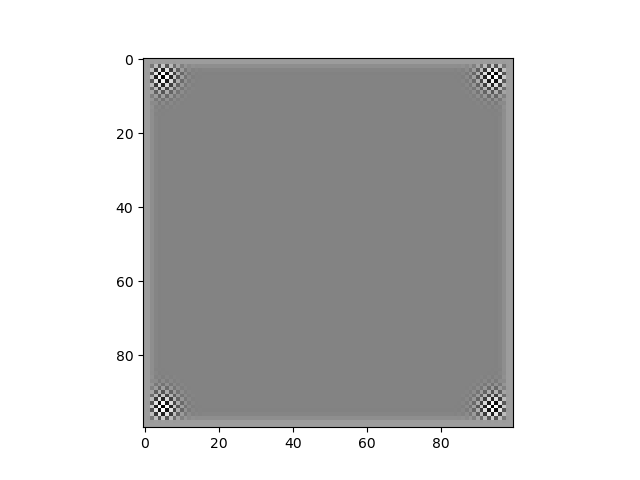

In [108]:
fig, ax = plt.subplots()
ax.imshow(z, cmap="gray")
plt.show()

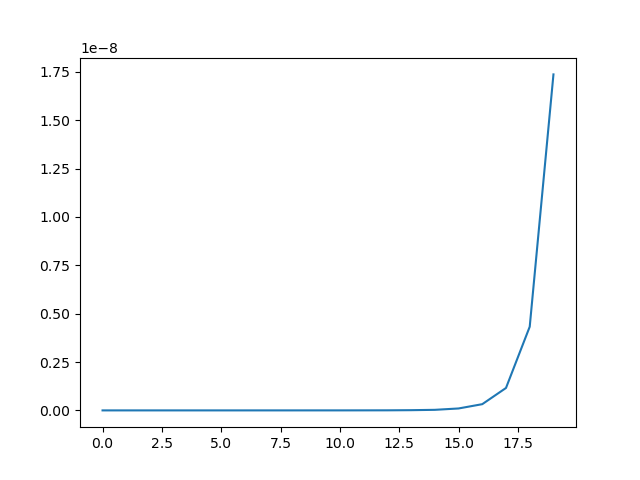

In [61]:
fig, ax = plt.subplots()
ax.plot(E)
plt.show()

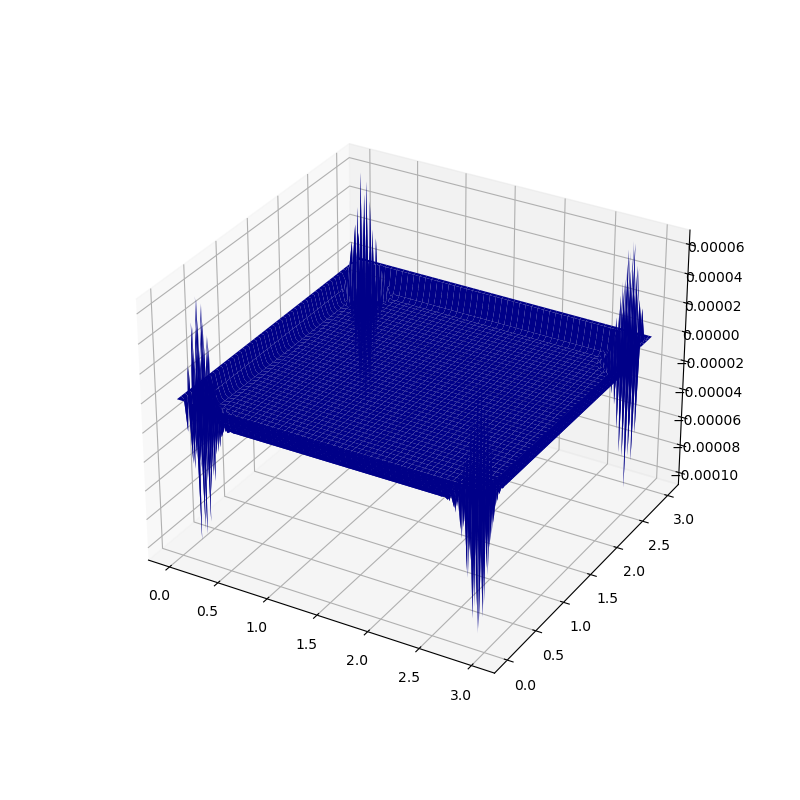

In [62]:
%matplotlib widget
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, color='blue')